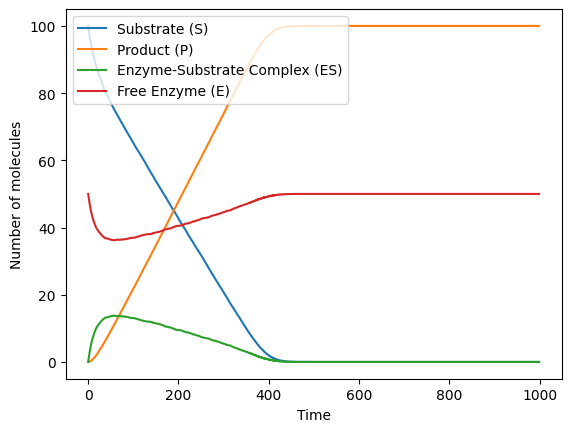

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def michaelis_menten_monte_carlo(E0, S0, k1, k2, k3, num_steps, num_simulations=1):
    """
    Monte Carlo simulation of Michaelis-Menten enzyme kinetics

    Parameters:
    - E0: Initial enzyme concentration
    - S0: Initial substrate concentration
    - k1: Forward rate constant (E + S -> ES)
    - k2: Reverse rate constant (ES -> E + S)
    - k3: Catalytic rate constant (ES -> E + P)
    - num_steps: Number of time steps to simulate
    - num_simulations: Number of independent simulations to run

    Returns:
    - Dictionary with time courses of all species averaged over simulations
    """

    # Initialize arrays to store results
    results = {
        'time': np.arange(num_steps),
        'E': np.zeros(num_steps),
        'S': np.zeros(num_steps),
        'ES': np.zeros(num_steps),
        'P': np.zeros(num_steps)
    }

    for sim in range(num_simulations):
        # Initialize current state
        E = E0
        S = S0
        ES = 0
        P = 0

        # Store initial conditions
        results['E'][0] += E
        results['S'][0] += S
        results['ES'][0] += ES
        results['P'][0] += P

        for t in range(1, num_steps):
            # Calculate reaction propensities
            a1 = k1 * E * S  # E + S -> ES
            a2 = k2 * ES      # ES -> E + S
            a3 = k3 * ES       # ES -> E + P
            a_total = a1 + a2 + a3

            # Determine next reaction time (exponentially distributed)
            tau = np.random.exponential(1.0 / a_total) if a_total > 0 else float('inf')

            # Choose which reaction occurs
            if a_total > 0:
                rand = np.random.random()
                if rand < a1/a_total:
                    # E + S -> ES
                    E -= 1
                    S -= 1
                    ES += 1
                elif rand < (a1 + a2)/a_total:
                    # ES -> E + S
                    ES -= 1
                    E += 1
                    S += 1
                else:
                    # ES -> E + P
                    ES -= 1
                    E += 1
                    P += 1

            # Store current state
            results['E'][t] += E
            results['S'][t] += S
            results['ES'][t] += ES
            results['P'][t] += P

    # Average over simulations
    if num_simulations > 1:
        for key in ['E', 'S', 'ES', 'P']:
            results[key] = results[key] / num_simulations

    return results

# Simulation parameters
E0 = 50      # Initial enzyme molecules
S0 = 100     # Initial substrate molecules
k1 = 0.001   # Rate constant for E + S -> ES
k2 = 0.1     # Rate constant for ES -> E + S
k3 = 0.1     # Rate constant for ES -> E + P
num_steps = 1000
num_simulations = 1000  # Run multiple simulations for better statistics

# Run simulation
results = michaelis_menten_monte_carlo(E0, S0, k1, k2, k3, num_steps, num_simulations)

# Plot results
plt.plot(results['time'], results['S'], label='Substrate (S)')
plt.plot(results['time'], results['P'], label='Product (P)')
plt.plot(results['time'], results['ES'], label='Enzyme-Substrate Complex (ES)')
plt.plot(results['time'], results['E'], label='Free Enzyme (E)')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.legend()
plt.show()